In [5]:
apikey = 'OK8tMupr8C3vWNK6mlsEmyQPAx3UKD4qjDPwI442xIpSDtl3WJ2Yodf6nxVd3sXb '
secret = 'hgT8l2EdTSQf7aeH96J8VhupLRy1CJJ29Omldwsh5AIC1BVZc1HUiR3A7mraL2It'

In [ ]:
%pip install python-binance pandas mplfinance

In [8]:
from binance import Client, ThreadedWebsocketManager,ThreadedDepthCacheManager
import pandas as pd
import numpy as np

In [9]:
client = Client(apikey,secret)

In [12]:
tickers =client.get_all_tickers()
tickers

[{'symbol': 'ETHBTC', 'price': '0.07126000'},
 {'symbol': 'LTCBTC', 'price': '0.00287100'},
 {'symbol': 'BNBBTC', 'price': '0.00941200'},
 {'symbol': 'NEOBTC', 'price': '0.00056600'},
 {'symbol': 'QTUMETH', 'price': '0.00276800'},
 {'symbol': 'EOSETH', 'price': '0.00081000'},
 {'symbol': 'SNTETH', 'price': '0.00001968'},
 {'symbol': 'BNTETH', 'price': '0.00083000'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00011400'},
 {'symbol': 'BNBETH', 'price': '0.13200000'},
 {'symbol': 'BTCUSDT', 'price': '44060.00000000'},
 {'symbol': 'ETHUSDT', 'price': '3138.99000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00001176'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [13]:
print (tickers)

[{'symbol': 'ETHBTC', 'price': '0.07126000'}, {'symbol': 'LTCBTC', 'price': '0.00287100'}, {'symbol': 'BNBBTC', 'price': '0.00941200'}, {'symbol': 'NEOBTC', 'price': '0.00056600'}, {'symbol': 'QTUMETH', 'price': '0.00276800'}, {'symbol': 'EOSETH', 'price': '0.00081000'}, {'symbol': 'SNTETH', 'price': '0.00001968'}, {'symbol': 'BNTETH', 'price': '0.00083000'}, {'symbol': 'BCCBTC', 'price': '0.07908100'}, {'symbol': 'GASBTC', 'price': '0.00011400'}, {'symbol': 'BNBETH', 'price': '0.13200000'}, {'symbol': 'BTCUSDT', 'price': '44060.00000000'}, {'symbol': 'ETHUSDT', 'price': '3138.99000000'}, {'symbol': 'HSRBTC', 'price': '0.00041400'}, {'symbol': 'OAXETH', 'price': '0.00017780'}, {'symbol': 'DNTETH', 'price': '0.00002801'}, {'symbol': 'MCOETH', 'price': '0.00577200'}, {'symbol': 'ICNETH', 'price': '0.00166300'}, {'symbol': 'MCOBTC', 'price': '0.00021140'}, {'symbol': 'WTCBTC', 'price': '0.00001176'}, {'symbol': 'WTCETH', 'price': '0.00023700'}, {'symbol': 'LRCBTC', 'price': '0.00002565'},

In [24]:
ticker_df = pd.DataFrame(tickers)

In [15]:
ticker_df.head()

,symbol,price
0,ETHBTC,0.07126000
1,LTCBTC,0.00287100
2,BNBBTC,0.00941200
3,NEOBTC,0.00056600
4,QTUMETH,0.00276800


In [25]:
info =client.get_exchange_info()

In [26]:
symbols= [x['symbol'] for x in info['symbols']]

In [ ]:
ticker = [symbol for symbol in symbols if symbol.endswith('USDT')]
ticker

In [28]:
def getdailydata(symbol):
    frame = pd.DataFrame(client.get_historical_klines(symbol,'1d','365 days ago UTC'))
    if len(frame) > 0:
        frame = frame.iloc[:,:5]
        frame.columns = ['Time','Open','High','Low','Close']
        frame = frame.set_index('Time')
        frame.index = pd.to_datetime(frame.index,unit='ms')
        frame = frame.astype(float)
        return frame

In [29]:
test=getdailydata('BTCUSDT')

In [ ]:
test

In [31]:
test.to_csv('BTCUSDT.csv')

In [36]:
dfs =[]

for coin in ticker:
    dfs.append(getdailydata(coin))

In [ ]:
dfs

In [38]:
mergeddf = pd.concat(dict(zip(ticker,dfs)),axis=1)

In [40]:
closesdf = mergeddf.loc[:,mergeddf.columns.get_level_values(1).isin(['Close'])]

In [41]:
closesdf.columns = closesdf.columns.droplevel(1)

In [42]:
closesdf

,BTCUSDT,ETHUSDT,BNBUSDT,NEOUSDT,LTCUSDT,QTUMUSDT,ADAUSDT,XRPUSDT,EOSUSDT,TUSDUSDT,...,XNOUSDT,WOOUSDT,ALPINEUSDT,TUSDT,ASTRUSDT,NBTUSDT,GMTUSDT,KDAUSDT,APEUSDT,BSWUSDT
Time,,,,,,,,,,,,,,,,,,,,,
2021-03-26,55025.59,1698.84,255.2105,41.652,183.45,8.635,1.21420,0.56357,4.1849,0.9994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-27,55817.14,1712.63,269.2234,41.106,184.06,8.535,1.17678,0.54752,4.0912,0.9998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-28,55777.63,1687.01,268.4263,44.763,184.24,8.207,1.18983,0.54552,4.1106,1.0002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-29,57635.47,1816.74,275.2991,45.499,193.73,8.753,1.20239,0.56538,4.2785,1.0002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-30,58746.57,1840.46,311.2962,44.947,195.74,8.760,1.21189,0.56210,4.3361,0.9996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-21,41002.25,2890.03,396.0000,22.590,116.00,6.842,0.91700,0.83730,2.3480,0.9997,...,2.213,0.5627,8.9526,0.1238,0.1031,0.02326,0.79799,6.091,10.5042,0.8586
2022-03-22,42364.13,2969.64,404.3000,23.870,122.70,7.605,0.97500,0.83660,2.5500,0.9996,...,2.231,0.5608,8.8344,0.1245,0.1050,0.02165,0.80704,6.122,12.2170,0.8194
2022-03-23,42882.76,3036.00,408.4000,24.340,122.40,7.879,1.10800,0.83760,2.5000,0.9996,...,2.280,0.5726,8.2965,0.1255,0.1069,0.02198,0.76876,6.375,13.3120,0.6883


In [43]:
logretdf = np.log(closesdf.pct_change() + 1)

In [46]:
logretdf.corr()

,BTCUSDT,ETHUSDT,BNBUSDT,NEOUSDT,LTCUSDT,QTUMUSDT,ADAUSDT,XRPUSDT,EOSUSDT,TUSDUSDT,...,XNOUSDT,WOOUSDT,ALPINEUSDT,TUSDT,ASTRUSDT,NBTUSDT,GMTUSDT,KDAUSDT,APEUSDT,BSWUSDT
BTCUSDT,1.000000,0.819151,0.744910,0.745011,0.811068,0.708153,0.712289,0.697548,0.724394,-0.013894,...,0.572294,0.777513,0.307594,0.304784,0.428440,0.244801,0.012030,0.757204,0.528190,0.191172
ETHUSDT,0.819151,1.000000,0.816255,0.762671,0.837553,0.737055,0.724790,0.702724,0.752708,-0.020318,...,0.618811,0.843724,0.337004,0.256502,0.440087,0.199723,0.085679,0.703834,0.851610,-0.155633
BNBUSDT,0.744910,0.816255,1.000000,0.756951,0.781806,0.728288,0.719204,0.711524,0.718302,0.116172,...,0.608065,0.760232,0.215120,0.272928,0.424446,0.308942,0.199242,0.721662,0.629343,-0.014794
NEOUSDT,0.745011,0.762671,0.756951,1.000000,0.812900,0.854493,0.730545,0.704544,0.812477,-0.006216,...,0.422079,0.565966,0.199749,0.191553,0.418233,0.298744,-0.200191,0.601795,-0.113520,-0.169830
LTCUSDT,0.811068,0.837553,0.781806,0.812900,1.000000,0.794478,0.773218,0.782577,0.831545,0.102671,...,0.590206,0.749577,0.385138,0.134005,0.652740,0.288082,-0.015589,0.557378,0.168364,0.420766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NBTUSDT,0.244801,0.199723,0.308942,0.298744,0.288082,0.205801,0.239269,0.504735,0.216680,0.185397,...,0.022093,0.162788,0.153802,0.361733,0.224601,1.000000,-0.645715,0.106354,-0.540122,-0.252966
GMTUSDT,0.012030,0.085679,0.199242,-0.200191,-0.015589,-0.436731,-0.047467,0.234865,0.036490,0.240055,...,0.546424,-0.189541,0.017597,-0.109870,0.059661,-0.645715,1.000000,0.013959,-0.027235,-0.028769
KDAUSDT,0.757204,0.703834,0.721662,0.601795,0.557378,0.331084,0.555585,0.531051,0.320217,0.501463,...,0.385167,0.533492,0.601595,0.631365,0.372696,0.106354,0.013959,1.000000,0.480059,-0.490626
APEUSDT,0.528190,0.851610,0.629343,-0.113520,0.168364,-0.176260,0.215807,0.071189,0.197979,0.179715,...,-0.521745,0.651595,0.329379,0.767327,-0.293357,-0.540122,-0.027235,0.480059,1.000000,-0.520647


In [49]:
%pip install seaborn


^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:

import seaborn as sns

In [ ]:
sns.set(rc ={'figure.figsize':(50,30)})

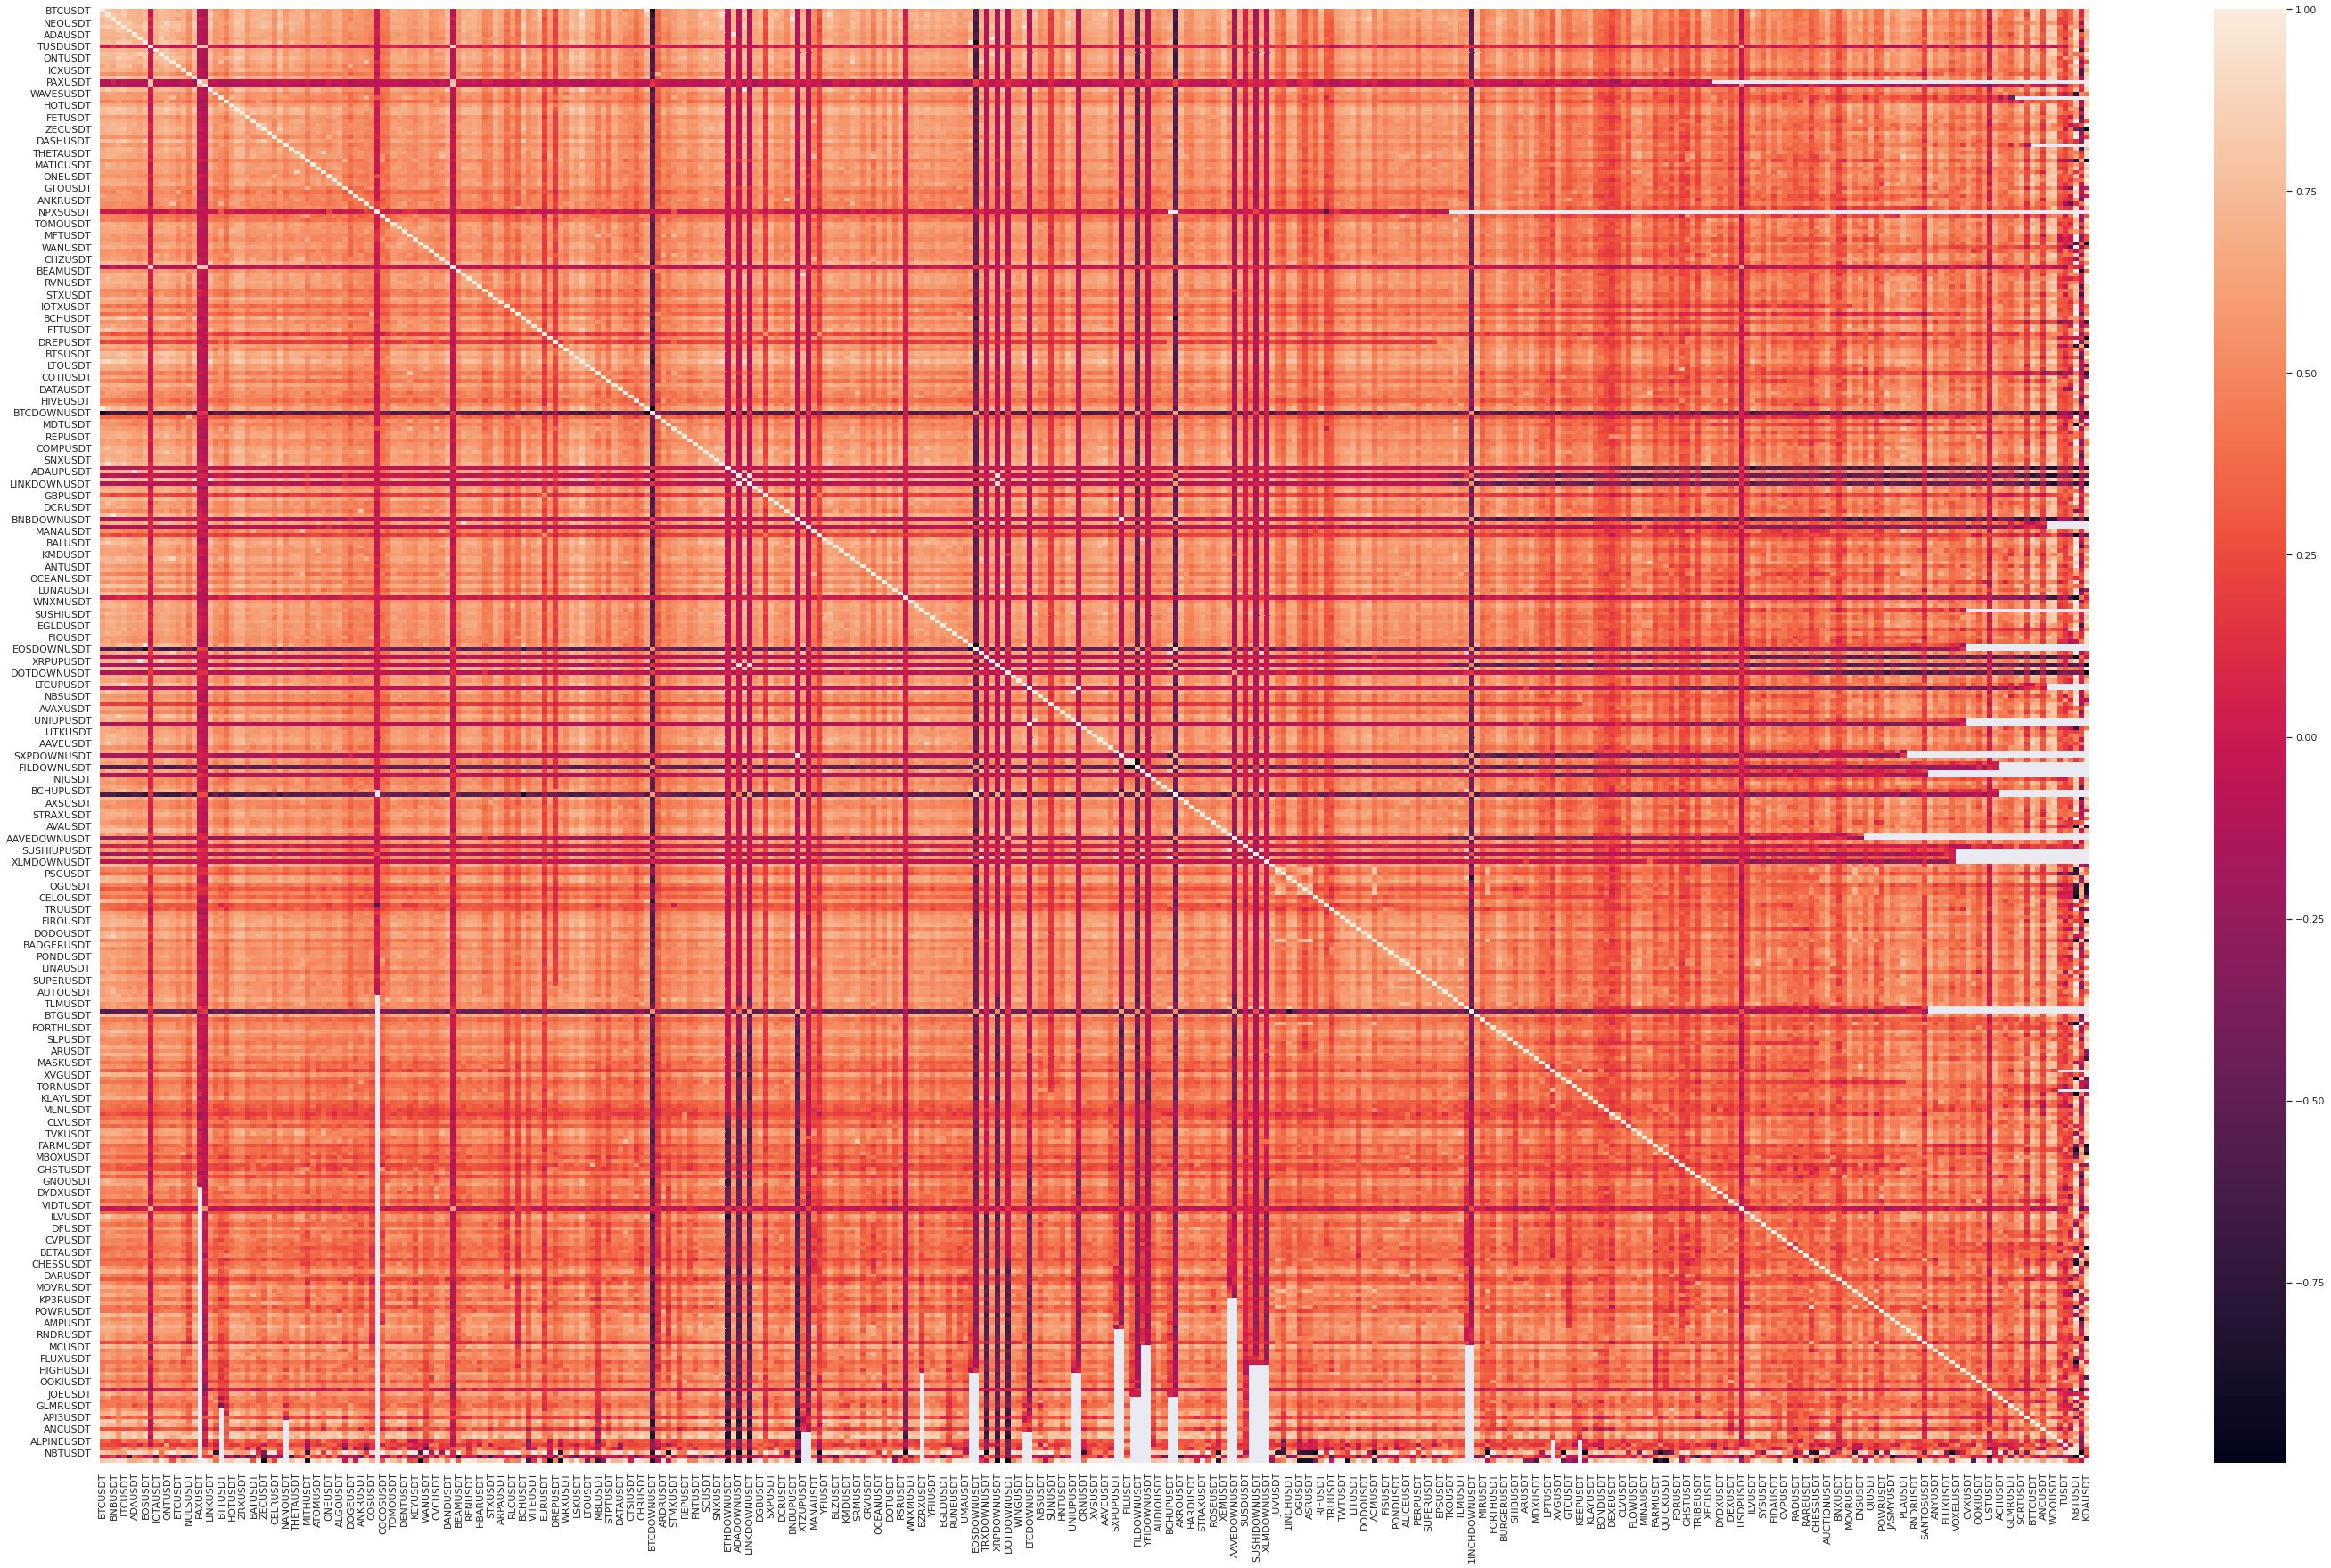

In [ ]:
sns.heatmap(logretdf.corr())

In [52]:
corr_df = logretdf.corr()

In [56]:
Results=corr_df['BTCUSDT'].nlargest(50)

In [82]:
type(Results)

pandas.core.series.Series

In [95]:
Reults.to_json('f.json')

t=2022-03-25T13:04:45+0500 lvl=eror msg="heartbeat timeout, terminating session" obj=csess id=a75692af6a13 clientid=90c14a6b906bb86d5d5f310235b79f2f
t=2022-03-25T13:04:46+0500 lvl=eror msg="session closed, starting reconnect loop" obj=csess id=4b8d35320bb9 err="session closed"
t=2022-03-25T13:04:48+0500 lvl=eror msg="failed to reconnect session" obj=csess id=4b8d35320bb9 err=EOF


In [83]:
def ff():
    return Results